## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 1. Data Exploration and Preprocessing:

In [4]:
data = pd.read_csv("adult_with_headers.csv")
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Check for missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [15]:
data[data.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [17]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [19]:
scaler_standard = StandardScaler()
scaler_standard

StandardScaler()

In [21]:
data[numerical_features] = scaler_standard.fit_transform(data[numerical_features])
data[numerical_features]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [23]:
scaler_MinMax = MinMaxScaler()
scaler_MinMax

MinMaxScaler()

In [25]:
data[numerical_features] = scaler_MinMax.fit_transform(data[numerical_features])
data[numerical_features]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [27]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [29]:
data_std_scaled = scaler_standard.fit_transform(data[numerical_cols])
data_std_scaled

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [31]:
data_minmax_scaled = scaler_MinMax.fit_transform(data[numerical_cols])
data_minmax_scaled

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [33]:
data_std_scaled = pd.DataFrame(data_std_scaled, columns=numerical_cols)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=numerical_cols)

In [35]:
data_std_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [37]:
data_minmax_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


### 2. Encoding Techniques:

In [40]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [42]:
le = LabelEncoder()
le

LabelEncoder()

In [44]:
data['workclass'] = le.fit_transform(data['workclass'])
data['workclass']

0        7
1        6
2        4
3        4
4        4
        ..
32556    4
32557    4
32558    4
32559    4
32560    5
Name: workclass, Length: 32561, dtype: int32

In [46]:
data['occupation'] = le.fit_transform(data['occupation'])
data['occupation']

0         1
1         4
2         6
3         6
4        10
         ..
32556    13
32557     7
32558     1
32559     1
32560     4
Name: occupation, Length: 32561, dtype: int32

### 3. Feature Engineering:

In [49]:
data['log_hours_per_week'] = np.log(data['hours_per_week'] + 1)
data['log_hours_per_week'] 

0        0.335013
1        0.115513
2        0.335013
3        0.335013
4        0.335013
           ...   
32556    0.320307
32557    0.335013
32558    0.335013
32559    0.177206
32560    0.335013
Name: log_hours_per_week, Length: 32561, dtype: float64

In [51]:
# Identify skewed numerical features
skewed_col = 'capital_gain' 
skewed_col

'capital_gain'

### 4. Feature Selection:

In [54]:
from sklearn.ensemble import IsolationForest

In [55]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest

IsolationForest(contamination=0.05, random_state=42)

In [58]:


# Select only numerical columns for outlier detection
num_cols = data.select_dtypes(include="number").columns

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data["Outlier"] = iso_forest.fit_predict(data[num_cols])  # Predict outliers

# Keep only non-outliers (where prediction is 1)
data_cleaned = data[data["Outlier"] == 1].drop(columns=["Outlier"])  # Drop Outlier column after filtering

In [60]:
data_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_hours_per_week
0,0.301370,7,0.044302,Bachelors,0.800000,Never-married,1,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K,0.335013
1,0.452055,6,0.048238,Bachelors,0.800000,Married-civ-spouse,4,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K,0.115513
2,0.287671,4,0.138113,HS-grad,0.533333,Divorced,6,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K,0.335013
3,0.493151,4,0.151068,11th,0.400000,Married-civ-spouse,6,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K,0.335013
4,0.150685,4,0.221488,Bachelors,0.800000,Married-civ-spouse,10,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K,0.335013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,13,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K,0.320307
32557,0.315068,4,0.096500,HS-grad,0.533333,Married-civ-spouse,7,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K,0.335013
32558,0.561644,4,0.094827,HS-grad,0.533333,Widowed,1,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K,0.335013
32559,0.068493,4,0.128499,HS-grad,0.533333,Never-married,1,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K,0.177206


In [62]:
print("Original DataFrame Shape:", data.shape)
print("Cleaned DataFrame Shape:", data_cleaned.shape)

Original DataFrame Shape: (32561, 17)
Cleaned DataFrame Shape: (30933, 16)


In [65]:
data['capital_gain_log'] = np.log1p(data[skewed_col])

In [67]:
print(data[['capital_gain_log']].head())

   capital_gain_log
0          0.021507
1          0.000000
2          0.000000
3          0.000000
4          0.000000


In [69]:
#skewed numerical feature

skewed_features = data[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

In [71]:
skewness = pd.DataFrame({'Skewness': skewed_features})
skewness

,Skewness
capital_gain,11.953848
capital_loss,4.594629
fnlwgt,1.446980
age,0.558743
hours_per_week,0.227643
education_num,-0.311676


In [87]:
#ppscore is still causing issues, use a correlation matrix instead:

import seaborn as sns
import matplotlib.pyplot as plt


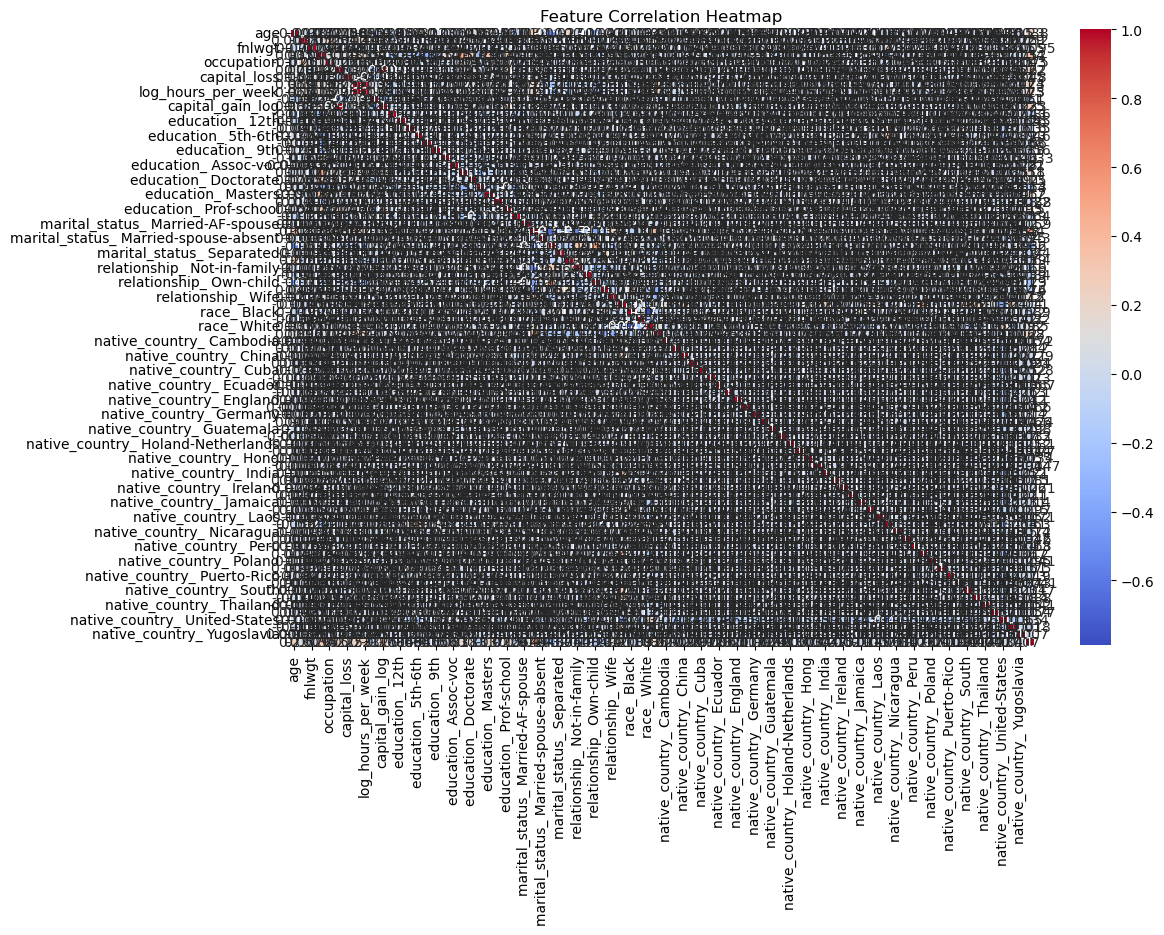

In [83]:
df_encoded = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()